# ABOUT THE DATASET

In [1]:
#THIS DATASET IS BLASTING REPORT OF AN IRON ORE MINE OF FY23.
#1.)Month-Corresponds to different month of FY23.
#2.)Date-Particular date at which blasting is done.
#3.)Material-Consist of different iron ore and waste
#(FO-FRIABLE ORE,HO-HARD ORE,WASTE,OB-OVERBURDEN,BHJ-BANDED HEMATITE JASPER,SG-SPHERIODAL GRAPHITE CAST IRON)
#4.)Pit-Different Pits of Iron Ore Mine
#5.)SME-Site Mixed Emulsion Explosive
#6.)Emulboost 125gm-Booster Explosive 125gm 
#7.)Emulboost 250gm-Booster Explosive 250gm
#8.)DTH 6M-Down The Hole(Non-Electric Delay Detonator) 6M
#9.)DTH 8M
#10.)DTH 10M
#11.)DTH 12M
#12.)TLD 5M(17ms)-Trunk Line Detonator 5M(Non-Electric Delay Detonator with 17ms delay)
#13.)TLD 5M(25ms)
#14.)TLD 5M(42ms)
#15.)TLD 5M(65ms)
#16.)TLD 5M(100ms)
#17.)ED-Electronic Detonator
#18.)Number Of Holes Drilled
#19.)Spacing-Lateral distance between drilled holes in a row
#20.)Burden-Distance between free face and drilled hole
#21.)Meterage Blasted-Sum of length of all the drilled hole
#22.)Total Blasted Volume-Volume of material extracted after blasting in m^3
#23.)Bulk Density
#24.)Total Blasted Tonnage-Material extracted after blasting in tonnage
#25.)PF-Powder Factor(the quantity of explosives used per unit volume or weight of rock/ore blasted)
#26.)Yield-Amount of material extracted per unit distance blasted(tonnage blasted/meterage blasted)
#27.)Booster Ratio-(Amount of booster explosive/amount of sme used for blast)
#28.)Drill Rate-(Meterage Blasted/Drill Hours)
#NOTE-BLASTING PATTERN USED IS STAGGERED PATTERN

**DISCLAIMER-THIS BLASTED VOLUME PREDICTION MODEL WILL ONLY WORKS WHEN GEOLOGY CONDITIONS,MINE REQUIREMENTS,BLASTING PARAMTERS AND BLAST DESIGN ARE MET.**

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading dataset
data=pd.read_csv('Blasting Report FY23.csv')

In [4]:
#used to display all the columns
pd.set_option('display.max_columns',None)

In [5]:
#displaying first five rows
data.head()

,Month,Date,"Material, RL",PIT,RL,SME(Kg),Emulboost 125gm,Emulboost 250gm,DTH 6M,DTH 8 M,DTH 10m,DTH 12m,TLD 5m (17ms),TLD 5m (25ms),TLD 5m (42ms),TLD 5m (65ms),TLD 5m (100ms),Total TLD,ED,EDET,I-KON,Harness wire,Nos. of hole,Spacing,Burden,Meterage Blasted,Total blasted Volume,BD,Total Blasted Tonnage,P.F,Yield
0,April'22,04.04.2022,FO Pit3 660,PIT3,660,9120,66.0,66.0,NaN,66.0,NaN,66.0,NaN,28.0,23.0,23.0,NaN,74.0,2.0,NaN,NaN,NaN,66,4.0,4.0,693,11088.0,3.5,38808.0,4.26,56.0
1,April'22,04.04.2022,HO Pit2 700,PIT2,700,3200,44.0,NaN,NaN,44.0,NaN,NaN,NaN,NaN,10.0,21.0,20.0,51.0,2.0,NaN,NaN,NaN,44,4.0,3.5,308,4312.0,4.0,17248.0,5.39,56.0
2,April'22,06.04.2022,HO Pit2 700,PIT2,700,9490,137.0,40.0,NaN,97.0,NaN,NaN,50.0,48.0,47.0,NaN,NaN,145.0,2.0,NaN,NaN,NaN,137,4.0,3.5,782,10948.0,4.0,43792.0,4.61,56.0
3,April'22,07.04.2022,Waste Pit3 670,PIT3,670,7100,165.0,165.0,80.0,85.0,NaN,NaN,71.0,53.0,47.0,NaN,NaN,171.0,2.0,NaN,NaN,NaN,165,4.0,4.0,787,12592.0,3.0,37776.0,5.32,48.0
4,April'22,08.04.2022,FO Pit3 660,PIT3,660,3200,47.0,NaN,NaN,47.0,NaN,NaN,20.0,17.0,17.0,NaN,NaN,54.0,2.0,NaN,NaN,NaN,47,4.0,4.0,329,5264.0,3.5,18424.0,5.76,56.0


In [6]:
#printing dimensions of dataset
data.shape

(187, 31)

In [7]:
#printing number of rows and columns in dataset
print('There are {0} rows and {1} columns in dataset'.format(data.shape[0],data.shape[1]))

There are 187 rows and 31 columns in dataset


In [8]:
#printing names of the columns in dataset
data.columns

Index(['Month', 'Date', 'Material, RL', 'PIT', 'RL', 'SME(Kg)',
       'Emulboost 125gm', 'Emulboost 250gm', 'DTH 6M', 'DTH  8 M', 'DTH 10m',
       'DTH 12m', 'TLD 5m (17ms)', 'TLD 5m (25ms)', 'TLD 5m (42ms)',
       'TLD 5m (65ms)', 'TLD 5m (100ms)', 'Total TLD', 'ED', 'EDET', 'I-KON',
       'Harness wire', 'Nos. of hole', 'Spacing', 'Burden',
       'Meterage  Blasted', 'Total blasted Volume', 'BD',
       'Total Blasted Tonnage', 'P.F', 'Yield'],
      dtype='object')

In [9]:
#displaying information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  187 non-null    object 
 1   Date                   187 non-null    object 
 2   Material, RL           187 non-null    object 
 3   PIT                    187 non-null    object 
 4   RL                     187 non-null    int64  
 5   SME(Kg)                187 non-null    int64  
 6   Emulboost 125gm        173 non-null    float64
 7   Emulboost 250gm        145 non-null    float64
 8   DTH 6M                 40 non-null     float64
 9   DTH  8 M               115 non-null    float64
 10  DTH 10m                64 non-null     float64
 11  DTH 12m                108 non-null    float64
 12  TLD 5m (17ms)          74 non-null     float64
 13  TLD 5m (25ms)          164 non-null    float64
 14  TLD 5m (42ms)          148 non-null    float64
 15  TLD 5m

In [10]:
#printing data types of all the columns present
data.dtypes

Month                     object
Date                      object
Material, RL              object
PIT                       object
RL                         int64
SME(Kg)                    int64
Emulboost 125gm          float64
Emulboost 250gm          float64
DTH 6M                   float64
DTH  8 M                 float64
DTH 10m                  float64
DTH 12m                  float64
TLD 5m (17ms)            float64
TLD 5m (25ms)            float64
TLD 5m (42ms)            float64
TLD 5m (65ms)            float64
TLD 5m (100ms)           float64
Total TLD                float64
ED                       float64
EDET                     float64
I-KON                    float64
Harness wire             float64
Nos. of hole               int64
Spacing                  float64
Burden                   float64
Meterage  Blasted          int64
Total blasted Volume     float64
BD                       float64
Total Blasted Tonnage    float64
P.F                      float64
Yield     

In [11]:
#printing number of duplicate rows present in dataset
data.duplicated().sum()

0

In [12]:
print('There are {} duplicate rows in dataset'.format(0))

There are 0 duplicate rows in dataset


In [13]:
#converting data type of Date from object to datetime
data['Date']=pd.to_datetime(data['Date'])

In [14]:
#printing the updated data types of each columns in dataset
data.dtypes

Month                            object
Date                     datetime64[ns]
Material, RL                     object
PIT                              object
RL                                int64
SME(Kg)                           int64
Emulboost 125gm                 float64
Emulboost 250gm                 float64
DTH 6M                          float64
DTH  8 M                        float64
DTH 10m                         float64
DTH 12m                         float64
TLD 5m (17ms)                   float64
TLD 5m (25ms)                   float64
TLD 5m (42ms)                   float64
TLD 5m (65ms)                   float64
TLD 5m (100ms)                  float64
Total TLD                       float64
ED                              float64
EDET                            float64
I-KON                           float64
Harness wire                    float64
Nos. of hole                      int64
Spacing                         float64
Burden                          float64


In [15]:
#printing number of null values present in columns of dataset
data.isnull().sum()

Month                      0
Date                       0
Material, RL               0
PIT                        0
RL                         0
SME(Kg)                    0
Emulboost 125gm           14
Emulboost 250gm           42
DTH 6M                   147
DTH  8 M                  72
DTH 10m                  123
DTH 12m                   79
TLD 5m (17ms)            113
TLD 5m (25ms)             23
TLD 5m (42ms)             39
TLD 5m (65ms)             60
TLD 5m (100ms)           113
Total TLD                  2
ED                         3
EDET                     187
I-KON                    185
Harness wire             187
Nos. of hole               0
Spacing                    0
Burden                     0
Meterage  Blasted          0
Total blasted Volume       0
BD                         0
Total Blasted Tonnage      0
P.F                        0
Yield                      0
dtype: int64

<AxesSubplot:>

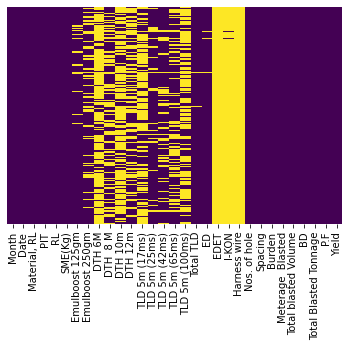

In [16]:
#visualising the null values using  heatmap
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
#dropping unnecessary columns from dataset
data.drop(['Total TLD','EDET','I-KON','Harness wire'],axis=1,inplace=True)

In [18]:
#printing number of null values in each column after dropping few columns from dataset
data.isnull().sum()

Month                      0
Date                       0
Material, RL               0
PIT                        0
RL                         0
SME(Kg)                    0
Emulboost 125gm           14
Emulboost 250gm           42
DTH 6M                   147
DTH  8 M                  72
DTH 10m                  123
DTH 12m                   79
TLD 5m (17ms)            113
TLD 5m (25ms)             23
TLD 5m (42ms)             39
TLD 5m (65ms)             60
TLD 5m (100ms)           113
ED                         3
Nos. of hole               0
Spacing                    0
Burden                     0
Meterage  Blasted          0
Total blasted Volume       0
BD                         0
Total Blasted Tonnage      0
P.F                        0
Yield                      0
dtype: int64

In [19]:
#renaming columns of dataset 
data.rename(columns={'Material, RL':'Material','PIT':'Pit','RL':'Reduced Level','Nos. of hole':'Number Of Hole','Meterage  Blasted':'Meterage Blasted','Total blasted Volume':'Total Blasted Volume'},inplace=True)
data.rename(columns={'DTH  8 M':'DTH 8M','BD':'Bulk Density','P.F':'Powder Factor','SME(Kg)':'Site Mixed Emulsion(Kg)','ED':'Electronic Detonator'},inplace=True)

In [20]:
#finding the rows where Electronic Detonator value is null
data[pd.isnull(data['Electronic Detonator'])]

,Month,Date,Material,Pit,Reduced Level,Site Mixed Emulsion(Kg),Emulboost 125gm,Emulboost 250gm,DTH 6M,DTH 8M,DTH 10m,DTH 12m,TLD 5m (17ms),TLD 5m (25ms),TLD 5m (42ms),TLD 5m (65ms),TLD 5m (100ms),Electronic Detonator,Number Of Hole,Spacing,Burden,Meterage Blasted,Total Blasted Volume,Bulk Density,Total Blasted Tonnage,Powder Factor,Yield
21,May'22,2022-05-18,HO Pit2 680,PIT2,680,5200,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,4.0,3.5,510,7140.0,4.0,28560.00,5.49,56.00
27,June'22,2022-03-06,HO Pit2 680,PIT2,680,15650,NaN,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104,3.5,3.5,1092,13377.0,4.0,54578.16,3.49,49.98
56,July'22,2022-07-26,waste pit 2 700,PIT2,700,6255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,4.0,4.0,510,8160.0,3.0,24969.60,3.99,48.96


In [21]:
#printing unique values in column Material
data['Material'].unique()

array(['FO Pit3 660', 'HO Pit2 700', 'Waste Pit3 670', 'HO Pit1 700',
       'SG Pit3 670', 'Waste Pit3 680', 'FO Pit1 700', 'SG Pit1 700',
       'FO Pit3 670', 'FO Pit3 650', 'FO SG Pit3 660', 'HO Pit2 680',
       'HO Pit1 690', 'SG Pit3 680', 'Waste Pit1 700', 'Waste Pit2 680',
       'SG Pit2 680', 'SG Pit 3 670', 'FO pit 3 670',
       'waste (BHJ)pit 3 660', 'HO pit 1 690', 'waste (BHJ)pit 2 660',
       'SG Pit 3 680', 'SG Pit 1 700', 'waste pit 2 669 ', 'HO pit1 690 ',
       'HO pit 2 680', 'waste  pit 2 700', 'HO pit 2 700',
       'FO and BHJ pit3  680', 'FO pit 3 650', 'SG pit3 680 ',
       'HO pit 2 690', 'HO pit 1 700', 'SG pit2 680', 'SG pit 3 680',
       'SG pit 1 700', 'FO pit 3 660', 'HO pit 1 ', 'SG pit 2 690',
       'HO pit2 690', 'SG pit 3 670', 'BHJ pit 3 670', 'HO pit1 700',
       'Ho pit 1 700', 'SG pit3 680', 'HO PIT2 690', 'OB pit2 690',
       'SG pit 2 680', 'OB pit 1 700', 'OB', 'HO', 'SG', 'FO'],
      dtype=object)

In [22]:
#function to modify the column Material
def Material(value):
    value=value.split()[0]
    return value
data['Material']=data['Material'].apply(Material)

In [23]:
#printing unique values present in Material column after modification
data['Material'].unique()

array(['FO', 'HO', 'Waste', 'SG', 'waste', 'BHJ', 'Ho', 'OB'],
      dtype=object)

In [24]:
#replacing values in column Material 
data['Material'].replace({'Waste':'WASTE','waste':'WASTE','Ho':'HO'},inplace=True)

In [25]:
#unique values in updated column Material
data['Material'].unique()

array(['FO', 'HO', 'WASTE', 'SG', 'BHJ', 'OB'], dtype=object)

In [26]:
#function to modify column Pit
def PIT(value):
    value=value.lower().capitalize()
    return value
data['Pit']=data['Pit'].apply(PIT)

In [27]:
#generating a random value in column Pit
data['Pit'].sample()

121    Pit1
Name: Pit, dtype: object

In [28]:
#filling nan values with 0
data['Emulboost 125gm'].fillna(0,inplace=True)
data['Emulboost 250gm'].fillna(0,inplace=True)
data['DTH 6M'].fillna(0,inplace=True)
data['DTH 8M'].fillna(0,inplace=True)
data['DTH 10m'].fillna(0,inplace=True)
data['DTH 12m'].fillna(0,inplace=True)
data['TLD 5m (17ms)'].fillna(0,inplace=True)
data['TLD 5m (25ms)'].fillna(0,inplace=True)
data['TLD 5m (42ms)'].fillna(0,inplace=True)
data['TLD 5m (65ms)'].fillna(0,inplace=True)
data['TLD 5m (100ms)'].fillna(0,inplace=True)

In [29]:
#dropping rows consisting of null values 
data.dropna(axis=0,inplace=True)

In [30]:
#checking number of null values in each column of dataset after dropping of rows and columns from dataset
data.isnull().sum()

Month                      0
Date                       0
Material                   0
Pit                        0
Reduced Level              0
Site Mixed Emulsion(Kg)    0
Emulboost 125gm            0
Emulboost 250gm            0
DTH 6M                     0
DTH 8M                     0
DTH 10m                    0
DTH 12m                    0
TLD 5m (17ms)              0
TLD 5m (25ms)              0
TLD 5m (42ms)              0
TLD 5m (65ms)              0
TLD 5m (100ms)             0
Electronic Detonator       0
Number Of Hole             0
Spacing                    0
Burden                     0
Meterage Blasted           0
Total Blasted Volume       0
Bulk Density               0
Total Blasted Tonnage      0
Powder Factor              0
Yield                      0
dtype: int64

<AxesSubplot:>

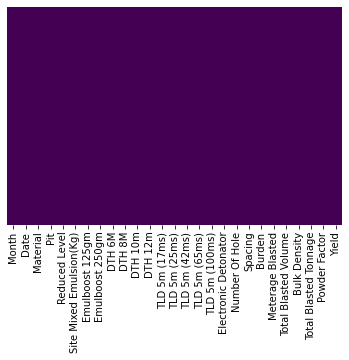

In [31]:
#visualising null values after data cleaning
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
#printing the updated dimensions of dataset
data.shape

(184, 27)

In [33]:
#reseting index
data.reset_index(drop=True)

,Month,Date,Material,Pit,Reduced Level,Site Mixed Emulsion(Kg),Emulboost 125gm,Emulboost 250gm,DTH 6M,DTH 8M,DTH 10m,DTH 12m,TLD 5m (17ms),TLD 5m (25ms),TLD 5m (42ms),TLD 5m (65ms),TLD 5m (100ms),Electronic Detonator,Number Of Hole,Spacing,Burden,Meterage Blasted,Total Blasted Volume,Bulk Density,Total Blasted Tonnage,Powder Factor,Yield
0,April'22,2022-04-04,FO,Pit3,660,9120,66.0,66.0,0.0,66.0,0.0,66.0,0.0,28.0,23.0,23.0,0.0,2.0,66,4.0,4.0,693,11088.0,3.5,38808.00,4.26,56.00
1,April'22,2022-04-04,HO,Pit2,700,3200,44.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,10.0,21.0,20.0,2.0,44,4.0,3.5,308,4312.0,4.0,17248.00,5.39,56.00
2,April'22,2022-06-04,HO,Pit2,700,9490,137.0,40.0,0.0,97.0,0.0,0.0,50.0,48.0,47.0,0.0,0.0,2.0,137,4.0,3.5,782,10948.0,4.0,43792.00,4.61,56.00
3,April'22,2022-07-04,WASTE,Pit3,670,7100,165.0,165.0,80.0,85.0,0.0,0.0,71.0,53.0,47.0,0.0,0.0,2.0,165,4.0,4.0,787,12592.0,3.0,37776.00,5.32,48.00
4,April'22,2022-08-04,FO,Pit3,660,3200,47.0,0.0,0.0,47.0,0.0,0.0,20.0,17.0,17.0,0.0,0.0,2.0,47,4.0,4.0,329,5264.0,3.5,18424.00,5.76,56.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Mar'23,2023-03-27,SG,Pit1,700,10540,91.0,91.0,0.0,91.0,0.0,91.0,0.0,33.0,27.0,22.0,15.0,2.0,91,4.0,3.5,956,17208.0,3.5,61432.56,5.83,64.26
180,Mar'23,2023-03-27,HO,Pit1,690,12610,80.0,95.0,0.0,80.0,15.0,80.0,0.0,42.0,25.0,24.0,10.0,2.0,95,4.0,3.5,975,13650.0,4.0,55692.00,4.42,57.12
181,Mar'23,2023-03-22,HO,Pit1,700,7130,47.0,67.0,0.0,47.0,0.0,67.0,0.0,22.0,23.0,20.0,8.0,2.0,67,4.0,3.5,570,7980.0,4.0,32558.40,4.57,57.12
182,Mar'23,2023-03-24,SG,Pit1,680,10620,50.0,79.0,0.0,50.0,29.0,50.0,0.0,29.0,34.0,21.0,0.0,2.0,79,4.0,3.5,811,11354.0,3.5,40533.78,3.82,49.98


In [34]:
#printing the first five rows of dataset after cleaning the dataset
data.head(5)

,Month,Date,Material,Pit,Reduced Level,Site Mixed Emulsion(Kg),Emulboost 125gm,Emulboost 250gm,DTH 6M,DTH 8M,DTH 10m,DTH 12m,TLD 5m (17ms),TLD 5m (25ms),TLD 5m (42ms),TLD 5m (65ms),TLD 5m (100ms),Electronic Detonator,Number Of Hole,Spacing,Burden,Meterage Blasted,Total Blasted Volume,Bulk Density,Total Blasted Tonnage,Powder Factor,Yield
0,April'22,2022-04-04,FO,Pit3,660,9120,66.0,66.0,0.0,66.0,0.0,66.0,0.0,28.0,23.0,23.0,0.0,2.0,66,4.0,4.0,693,11088.0,3.5,38808.0,4.26,56.0
1,April'22,2022-04-04,HO,Pit2,700,3200,44.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,10.0,21.0,20.0,2.0,44,4.0,3.5,308,4312.0,4.0,17248.0,5.39,56.0
2,April'22,2022-06-04,HO,Pit2,700,9490,137.0,40.0,0.0,97.0,0.0,0.0,50.0,48.0,47.0,0.0,0.0,2.0,137,4.0,3.5,782,10948.0,4.0,43792.0,4.61,56.0
3,April'22,2022-07-04,WASTE,Pit3,670,7100,165.0,165.0,80.0,85.0,0.0,0.0,71.0,53.0,47.0,0.0,0.0,2.0,165,4.0,4.0,787,12592.0,3.0,37776.0,5.32,48.0
4,April'22,2022-08-04,FO,Pit3,660,3200,47.0,0.0,0.0,47.0,0.0,0.0,20.0,17.0,17.0,0.0,0.0,2.0,47,4.0,4.0,329,5264.0,3.5,18424.0,5.76,56.0


In [35]:
#printing unique months
data['Month'].unique()

array(["April'22", "May'22", "June'22", "July'22", "August'22",
       "September'22", "october'22", "November'22", "December'22",
       "January'23", "Feb'23", "Mar'23"], dtype=object)

In [36]:
#printing uniques values of Pit
data['Pit'].unique()

array(['Pit3', 'Pit2', 'Pit1'], dtype=object)

In [37]:
#printing unique values of Reduced Level
data['Reduced Level'].unique()

array([660, 700, 670, 680, 650, 690, 669, 710, 685], dtype=int64)

In [38]:
#filtering out quantitative variables
quant_variables=data.iloc[:,[5,6,7,21,22,23,24,25,26]]
quant_variables

,Site Mixed Emulsion(Kg),Emulboost 125gm,Emulboost 250gm,Meterage Blasted,Total Blasted Volume,Bulk Density,Total Blasted Tonnage,Powder Factor,Yield
0,9120,66.0,66.0,693,11088.0,3.5,38808.00,4.26,56.00
1,3200,44.0,0.0,308,4312.0,4.0,17248.00,5.39,56.00
2,9490,137.0,40.0,782,10948.0,4.0,43792.00,4.61,56.00
3,7100,165.0,165.0,787,12592.0,3.0,37776.00,5.32,48.00
4,3200,47.0,0.0,329,5264.0,3.5,18424.00,5.76,56.00
...,...,...,...,...,...,...,...,...,...
182,10540,91.0,91.0,956,17208.0,3.5,61432.56,5.83,64.26
183,12610,80.0,95.0,975,13650.0,4.0,55692.00,4.42,57.12
184,7130,47.0,67.0,570,7980.0,4.0,32558.40,4.57,57.12
185,10620,50.0,79.0,811,11354.0,3.5,40533.78,3.82,49.98


In [39]:
#printing statistical description of quantitative variables
quant_variables.describe()

,Site Mixed Emulsion(Kg),Emulboost 125gm,Emulboost 250gm,Meterage Blasted,Total Blasted Volume,Bulk Density,Total Blasted Tonnage,Powder Factor,Yield
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,9839.163043,79.320652,63.141304,804.695652,11674.271739,3.657609,43367.362174,4.636848,53.901341
std,5385.876285,54.169643,48.488201,402.398336,5853.892806,0.313009,21757.221365,0.929516,4.784608
min,750.000000,0.000000,0.000000,102.000000,1249.000000,3.000000,3821.940000,3.390000,37.470000
25%,6155.000000,50.000000,19.250000,509.000000,7805.000000,3.500000,28387.620000,4.075000,49.980000
50%,9055.000000,76.000000,66.000000,758.000000,10990.000000,3.500000,39485.985000,4.410000,56.044333
75%,12862.500000,99.000000,93.250000,997.250000,14799.750000,4.000000,54835.200000,4.882500,57.120000
max,27370.000000,519.000000,197.000000,2068.000000,29440.000000,4.000000,104664.000000,9.000000,65.280000


In [40]:
#calculation correlation values between quantitative variables
correlation=quant_variables.corr()
correlation

,Site Mixed Emulsion(Kg),Emulboost 125gm,Emulboost 250gm,Meterage Blasted,Total Blasted Volume,Bulk Density,Total Blasted Tonnage,Powder Factor,Yield
Site Mixed Emulsion(Kg),1.000000,0.566413,0.743288,0.960074,0.952285,0.094884,0.960904,-0.453197,0.054431
Emulboost 125gm,0.566413,1.000000,0.138753,0.636080,0.649531,0.011828,0.640448,-0.002983,0.029722
Emulboost 250gm,0.743288,0.138753,1.000000,0.731591,0.694158,0.111759,0.719649,-0.310666,0.039519
Meterage Blasted,0.960074,0.636080,0.731591,1.000000,0.984452,0.049321,0.983612,-0.302141,-0.003518
Total Blasted Volume,0.952285,0.649531,0.694158,0.984452,1.000000,-0.027368,0.981151,-0.288055,0.054855
Bulk Density,0.094884,0.011828,0.111759,0.049321,-0.027368,1.000000,0.147149,0.130466,0.603741
Total Blasted Tonnage,0.960904,0.640448,0.719649,0.983612,0.981151,0.147149,1.000000,-0.266458,0.151494
Powder Factor,-0.453197,-0.002983,-0.310666,-0.302141,-0.288055,0.130466,-0.266458,1.000000,0.266019
Yield,0.054431,0.029722,0.039519,-0.003518,0.054855,0.603741,0.151494,0.266019,1.000000


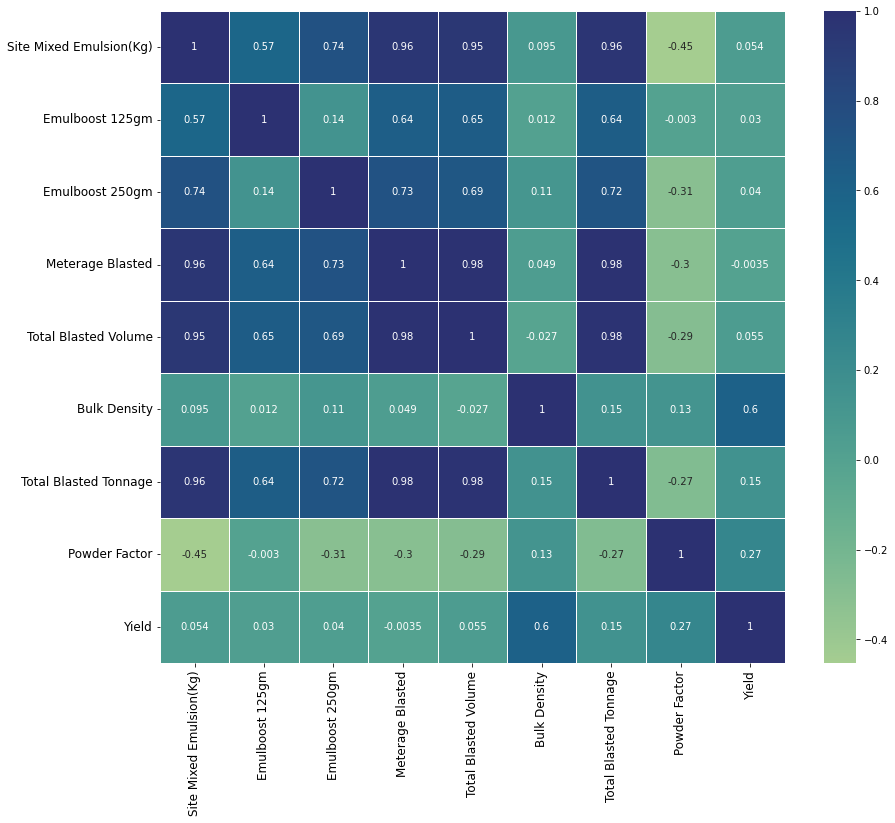

In [41]:
#visualising correlation values using heatmap
plt.figure(figsize=(14,12))
sns.heatmap(correlation,annot=True,linewidth=.5,cmap='crest')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

In [42]:
#calculating average yield per month
average_yield_per_month=data.groupby('Month',as_index=False,sort=False)['Yield'].mean()

In [43]:
#rounding of average yield values to 2 decimals 
def convert(value):
    value=np.round(value,decimals=2)
    return value
average_yield_per_month['Yield']=average_yield_per_month['Yield'].apply(convert)

In [44]:
#printing average yield per month
average_yield_per_month

,Month,Yield
0,April'22,54.23
1,May'22,53.67
2,June'22,52.20
3,July'22,53.56
4,August'22,54.05
5,September'22,52.13
6,october'22,51.29
7,November'22,54.28
8,December'22,54.80
9,January'23,55.99


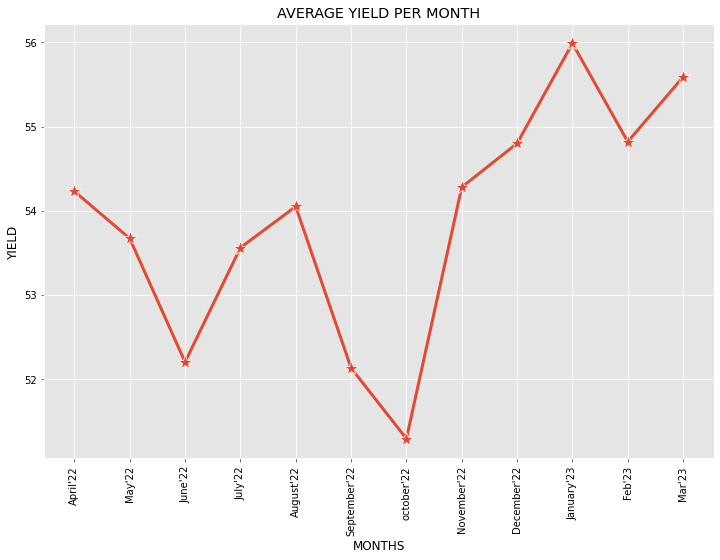

In [45]:
#visualising average yield per month
plt.figure(figsize=(12,8))
plt.style.use('ggplot')
sns.lineplot(x='Month',y='Yield',data=average_yield_per_month,marker='*',markersize=15,linewidth=3)
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK',fontsize=10)
plt.xlabel('MONTHS',color='BLACK',fontsize=12)
plt.ylabel('YIELD',color='BLACK',fontsize=12)
plt.title('AVERAGE YIELD PER MONTH')
plt.show()

In [46]:
#calculating total booster explosive used each day 
data['Total Booster Explosive(Kg)']=np.round((data['Emulboost 125gm']*125+data['Emulboost 250gm']*250)/1000,2)

In [47]:
#calculating booster ratio
data['Booster Ratio']=data['Total Booster Explosive(Kg)']/data['Site Mixed Emulsion(Kg)']

In [48]:
#printing first five rows of dataset
data.head(5)

,Month,Date,Material,Pit,Reduced Level,Site Mixed Emulsion(Kg),Emulboost 125gm,Emulboost 250gm,DTH 6M,DTH 8M,DTH 10m,DTH 12m,TLD 5m (17ms),TLD 5m (25ms),TLD 5m (42ms),TLD 5m (65ms),TLD 5m (100ms),Electronic Detonator,Number Of Hole,Spacing,Burden,Meterage Blasted,Total Blasted Volume,Bulk Density,Total Blasted Tonnage,Powder Factor,Yield,Total Booster Explosive(Kg),Booster Ratio
0,April'22,2022-04-04,FO,Pit3,660,9120,66.0,66.0,0.0,66.0,0.0,66.0,0.0,28.0,23.0,23.0,0.0,2.0,66,4.0,4.0,693,11088.0,3.5,38808.0,4.26,56.0,24.75,0.002714
1,April'22,2022-04-04,HO,Pit2,700,3200,44.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,10.0,21.0,20.0,2.0,44,4.0,3.5,308,4312.0,4.0,17248.0,5.39,56.0,5.50,0.001719
2,April'22,2022-06-04,HO,Pit2,700,9490,137.0,40.0,0.0,97.0,0.0,0.0,50.0,48.0,47.0,0.0,0.0,2.0,137,4.0,3.5,782,10948.0,4.0,43792.0,4.61,56.0,27.12,0.002858
3,April'22,2022-07-04,WASTE,Pit3,670,7100,165.0,165.0,80.0,85.0,0.0,0.0,71.0,53.0,47.0,0.0,0.0,2.0,165,4.0,4.0,787,12592.0,3.0,37776.0,5.32,48.0,61.88,0.008715
4,April'22,2022-08-04,FO,Pit3,660,3200,47.0,0.0,0.0,47.0,0.0,0.0,20.0,17.0,17.0,0.0,0.0,2.0,47,4.0,4.0,329,5264.0,3.5,18424.0,5.76,56.0,5.88,0.001837


In [49]:
#calculating first quartile and third quartile
Q1=data['Number Of Hole'].quantile(0.25)
Q3=data['Number Of Hole'].quantile(0.75)

In [50]:
#printing first quartile
Q1

61.0

In [51]:
#printing third quartile
Q3

106.0

In [52]:
#calculating INTER QUARTILE RANGE(IQR),Lower Bound and Upper Bound
IQR=Q3-Q1
Lower_Bound=Q1-1.5*IQR
Upper_Bound=Q3+1.5*IQR

In [53]:
#printing lower bound
Lower_Bound

-6.5

In [54]:
#printing upper bound
Upper_Bound

173.5

In [55]:
#removing outliers of number of holes
df=data[(data['Number Of Hole']>Lower_Bound) & (data['Number Of Hole']<Upper_Bound)]

In [56]:
#printing first five rows of dataset after removing outliers
df.head(5)

,Month,Date,Material,Pit,Reduced Level,Site Mixed Emulsion(Kg),Emulboost 125gm,Emulboost 250gm,DTH 6M,DTH 8M,DTH 10m,DTH 12m,TLD 5m (17ms),TLD 5m (25ms),TLD 5m (42ms),TLD 5m (65ms),TLD 5m (100ms),Electronic Detonator,Number Of Hole,Spacing,Burden,Meterage Blasted,Total Blasted Volume,Bulk Density,Total Blasted Tonnage,Powder Factor,Yield,Total Booster Explosive(Kg),Booster Ratio
0,April'22,2022-04-04,FO,Pit3,660,9120,66.0,66.0,0.0,66.0,0.0,66.0,0.0,28.0,23.0,23.0,0.0,2.0,66,4.0,4.0,693,11088.0,3.5,38808.0,4.26,56.0,24.75,0.002714
1,April'22,2022-04-04,HO,Pit2,700,3200,44.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,10.0,21.0,20.0,2.0,44,4.0,3.5,308,4312.0,4.0,17248.0,5.39,56.0,5.50,0.001719
2,April'22,2022-06-04,HO,Pit2,700,9490,137.0,40.0,0.0,97.0,0.0,0.0,50.0,48.0,47.0,0.0,0.0,2.0,137,4.0,3.5,782,10948.0,4.0,43792.0,4.61,56.0,27.12,0.002858
3,April'22,2022-07-04,WASTE,Pit3,670,7100,165.0,165.0,80.0,85.0,0.0,0.0,71.0,53.0,47.0,0.0,0.0,2.0,165,4.0,4.0,787,12592.0,3.0,37776.0,5.32,48.0,61.88,0.008715
4,April'22,2022-08-04,FO,Pit3,660,3200,47.0,0.0,0.0,47.0,0.0,0.0,20.0,17.0,17.0,0.0,0.0,2.0,47,4.0,4.0,329,5264.0,3.5,18424.0,5.76,56.0,5.88,0.001837


In [57]:
#printing dimensions of dataset after removing outliers
df.shape

(178, 29)

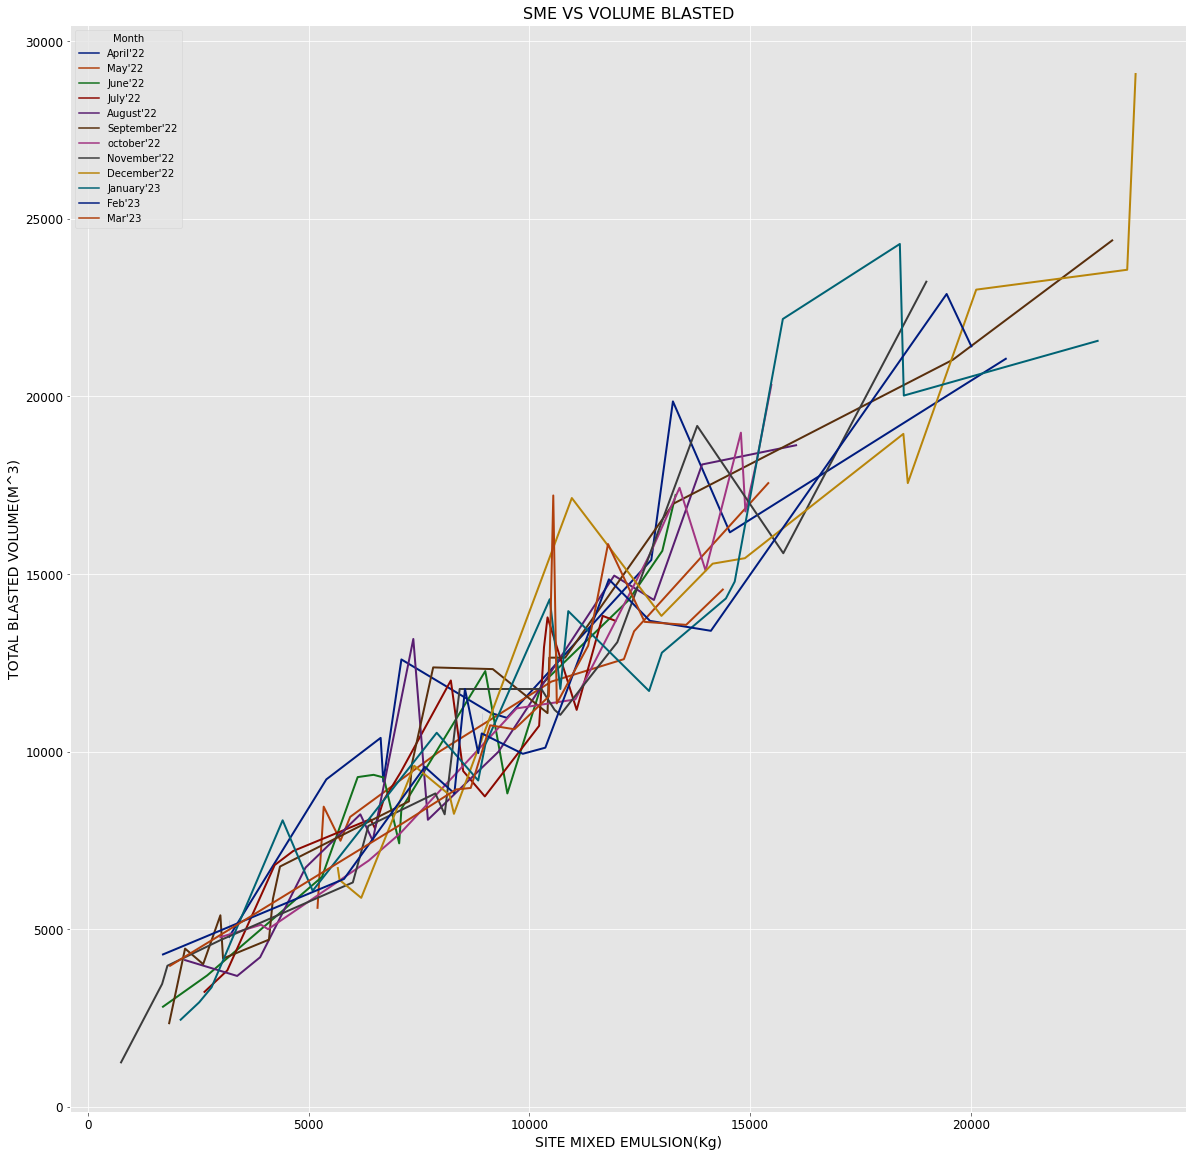

In [58]:
#visualising TOTAL SME vs TOTAL BLASTED VOLUME
plt.figure(figsize=(20,20))
sns.lineplot(x='Site Mixed Emulsion(Kg)',y='Total Blasted Volume',data=df,hue='Month',palette='dark',linewidth=2)
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.xlabel('SITE MIXED EMULSION(Kg)',color='BLACK',fontsize=14)
plt.ylabel('TOTAL BLASTED VOLUME(M^3)',color='BLACK',fontsize=14)
plt.title('SME VS VOLUME BLASTED',fontsize=16)
plt.show()

In [59]:
#finding unique number of months
months=data['Month'].unique()

In [60]:
#printing unique number of months
months

array(["April'22", "May'22", "June'22", "July'22", "August'22",
       "September'22", "october'22", "November'22", "December'22",
       "January'23", "Feb'23", "Mar'23"], dtype=object)

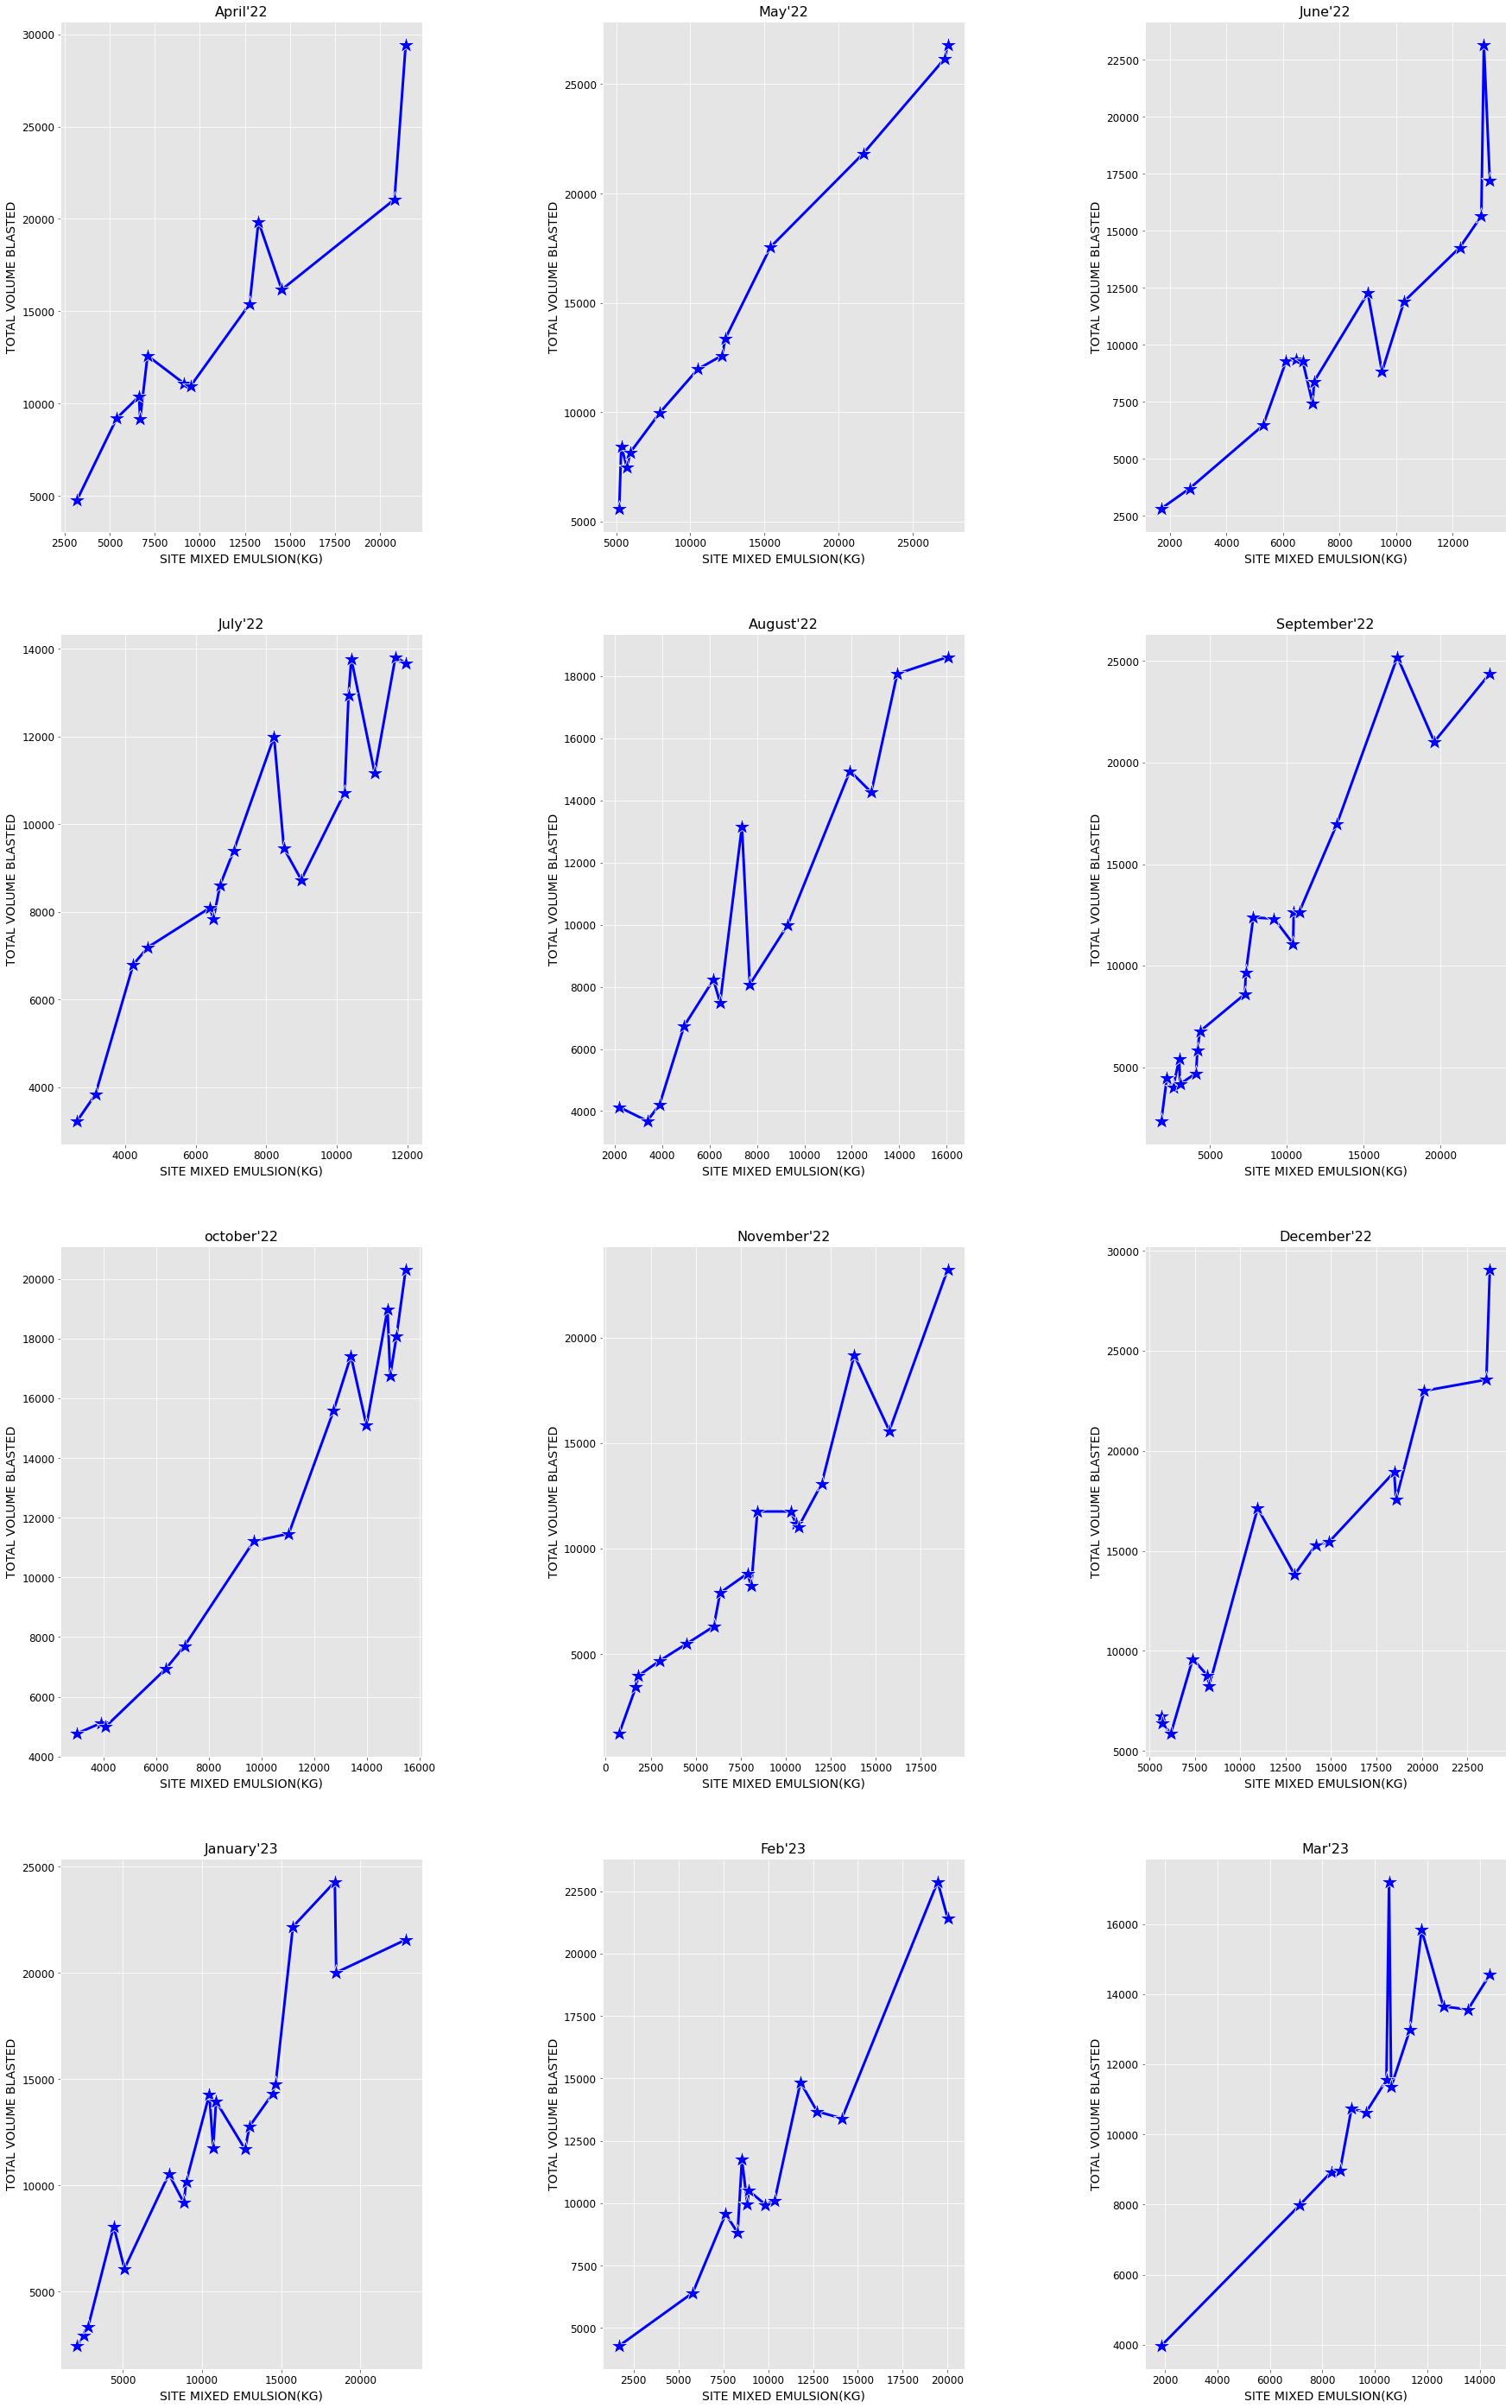

In [61]:
#visualising sme vs blasted volume for each month using lineplot
plt.figure(figsize=(30,50))
n=1
for i in range(0,data['Month'].nunique()):
    plt.subplot(4,3,n)
    plt.subplots_adjust(hspace=0.2, wspace = 0.5)
    sns.lineplot(x='Site Mixed Emulsion(Kg)',y='Total Blasted Volume',data=data[data['Month']==months[i]],marker='*',linewidth=3,markersize=20,color='Blue')
    n=n+1
    plt.xticks(color='BLACK',fontsize=12)
    plt.yticks(color='BLACK',fontsize=12)
    plt.xlabel('SITE MIXED EMULSION(KG)',color='BLACK',fontsize=14)
    plt.ylabel('TOTAL VOLUME BLASTED',color='BLACK',fontsize=14)
    plt.title(months[i],fontsize=16)
    

In [62]:
#calculating total blasted volume and site mixed emulsions per month 
total_sme_volume=data.groupby('Month',sort=False,as_index=False)['Site Mixed Emulsion(Kg)','Total Blasted Volume'].sum()

In [63]:
#printing total sme and total blasted volume per month
total_sme_volume

,Month,Site Mixed Emulsion(Kg),Total Blasted Volume
0,April'22,133580,174870.0
1,May'22,156770,170004.0
2,June'22,123580,159952.0
3,July'22,132698,161324.0
4,August'22,106090,131636.0
5,September'22,161860,204599.0
6,october'22,145608,174432.0
7,November'22,140500,166896.0
8,December'22,198830,219426.0
9,January'23,204990,234420.0


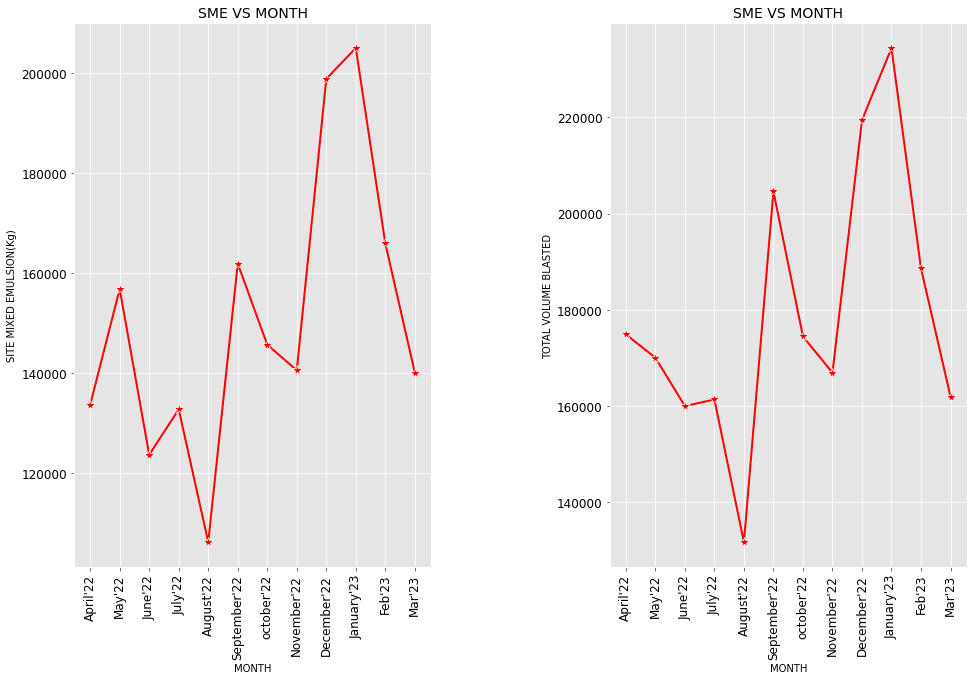

In [64]:
#visualising sme per month and blasted volume per month using lineplot
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.lineplot(x='Month',y='Site Mixed Emulsion(Kg)',data=total_sme_volume,color='RED',marker='*',linewidth=2,markersize=10)
plt.xticks(color='BLACK',fontsize=12,rotation=90)
plt.yticks(color='BLACK',fontsize=12)
plt.xlabel('MONTH',color='BLACK',fontsize=10)
plt.ylabel('SITE MIXED EMULSION(Kg)',color='BLACK',fontsize=10)
plt.title('SME VS MONTH',fontsize=14)
plt.subplot(1,2,2)
plt.subplots_adjust(hspace=0.5,wspace=0.5)
sns.lineplot(x='Month',y='Total Blasted Volume',data=total_sme_volume,color='RED',marker='*',linewidth=2,markersize=10)
plt.xticks(color='BLACK',fontsize=12,rotation=90)
plt.yticks(color='BLACK',fontsize=12)
plt.xlabel('MONTH',color='BLACK',fontsize=10)
plt.ylabel('TOTAL VOLUME BLASTED',color='BLACK',fontsize=10)
plt.title('SME VS MONTH',fontsize=14)
plt.show()

In [65]:
#calculating total sme used in each pit
pit_sme=data.groupby('Pit',sort=False,as_index=False)['Site Mixed Emulsion(Kg)'].sum().sort_values(by='Site Mixed Emulsion(Kg)',ascending=False)

In [66]:
#printing total sme used in each pit
pit_sme

,Pit,Site Mixed Emulsion(Kg)
2,Pit1,998882
0,Pit3,528350
1,Pit2,283174


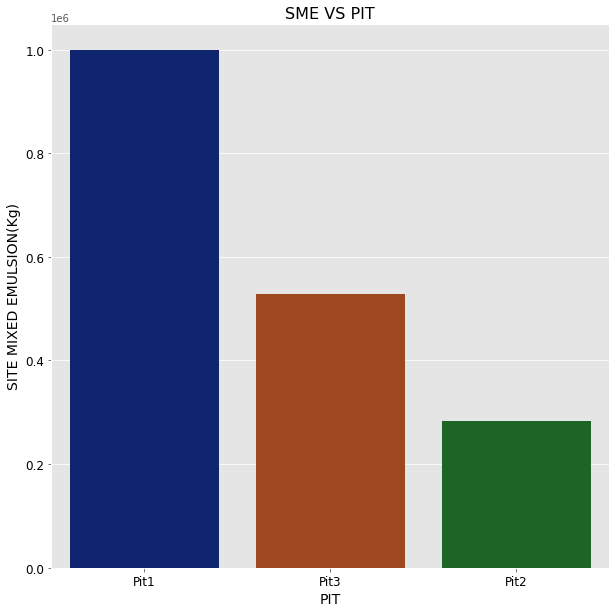

In [67]:
#visualising total sme used in each pit using barplot
plt.figure(figsize=(10,10))
sns.barplot(x='Pit',y='Site Mixed Emulsion(Kg)',data=pit_sme,palette='dark')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('SITE MIXED EMULSION(Kg)',color='BLACK',fontsize=14)
plt.xlabel('PIT',color='BLACK',fontsize=14)
plt.title('SME VS PIT',fontsize=16)
plt.show()

In [68]:
#calculating total blasted volume obtained from each pit
pit_volume=data.groupby('Pit',as_index=False)['Total Blasted Volume'].sum().sort_values(by='Total Blasted Volume',ascending=False)

In [69]:
#printing total blasted volume obtained from each pit
pit_volume

,Pit,Total Blasted Volume
0,Pit1,1118518.0
2,Pit3,665305.0
1,Pit2,364243.0


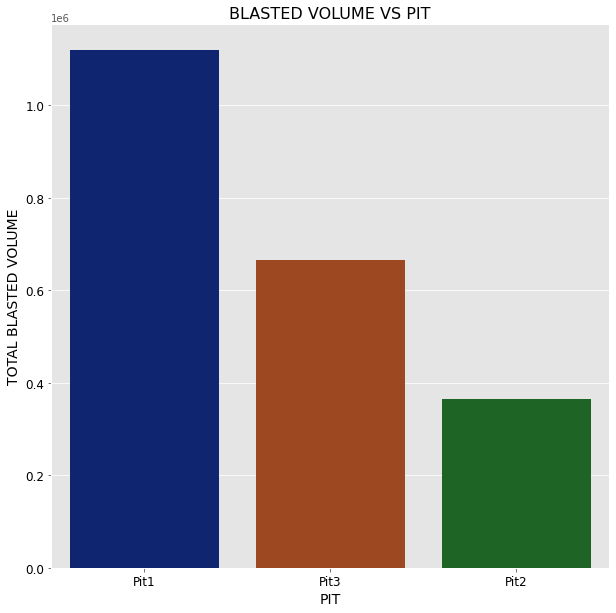

In [70]:
#visualising total blasted volume obtained from each pit using barplot
plt.figure(figsize=(10,10))
sns.barplot(x='Pit',y='Total Blasted Volume',data=pit_volume,palette='dark')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('TOTAL BLASTED VOLUME',color='BLACK',fontsize=14)
plt.xlabel('PIT',color='BLACK',fontsize=14)
plt.title('BLASTED VOLUME VS PIT',fontsize=16)
plt.show()

In [71]:
#calculating total sme used for different materials
material_sme=data.groupby('Material',sort=False,as_index=False)['Site Mixed Emulsion(Kg)'].sum().sort_values(by='Site Mixed Emulsion(Kg)',ascending=False)

In [72]:
#printing total sme used for different materials
material_sme

,Material,Site Mixed Emulsion(Kg)
1,HO,831746
3,SG,506630
0,FO,311940
5,OB,86230
2,WASTE,71660
4,BHJ,2200


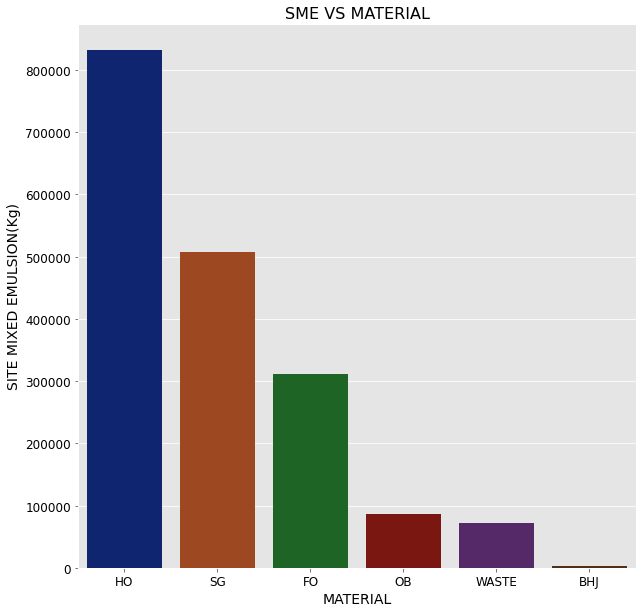

In [73]:
#visualising total sme used for different materials using barplot
plt.figure(figsize=(10,10))
sns.barplot(x='Material',y='Site Mixed Emulsion(Kg)',data=material_sme,palette='dark')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('SITE MIXED EMULSION(Kg)',color='BLACK',fontsize=14)
plt.xlabel('MATERIAL',color='BLACK',fontsize=14)
plt.title('SME VS MATERIAL',fontsize=16)
plt.show()

In [74]:
#calculating total blasted volume obtained for each material
material_volume=data.groupby('Material',sort=False,as_index=False)['Total Blasted Volume'].sum().sort_values(by='Total Blasted Volume',ascending=False)

In [75]:
#printing total blasted volume obtained for each material
material_volume

,Material,Total Blasted Volume
1,HO,912679.0
3,SG,612979.0
0,FO,406067.0
5,OB,110909.0
2,WASTE,100980.0
4,BHJ,4452.0


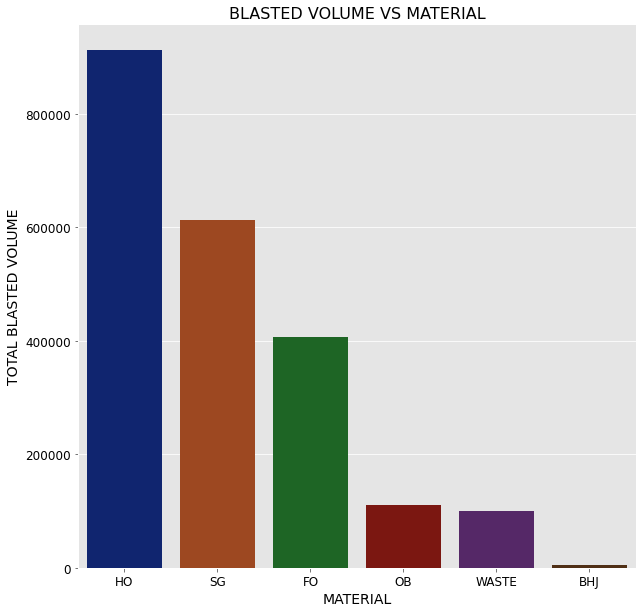

In [76]:
#visualising total blasted volume obtained for each material using barplot
plt.figure(figsize=(10,10))
sns.barplot(x='Material',y='Total Blasted Volume',data=material_volume,palette='dark')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('TOTAL BLASTED VOLUME',color='BLACK',fontsize=14)
plt.xlabel('MATERIAL',color='BLACK',fontsize=14)
plt.title('BLASTED VOLUME VS MATERIAL',fontsize=16)
plt.show()

In [77]:
#calculating total booster explosive used for each material
material_booster=data.groupby('Material',sort=False,as_index=False)['Total Booster Explosive(Kg)'].sum().sort_values(by='Total Booster Explosive(Kg)',ascending=False)

In [78]:
#printing total booster explosive used for each material
material_booster

,Material,Total Booster Explosive(Kg)
1,HO,2166.72
3,SG,1346.26
0,FO,784.49
5,OB,211.37
2,WASTE,200.11
4,BHJ,19.88


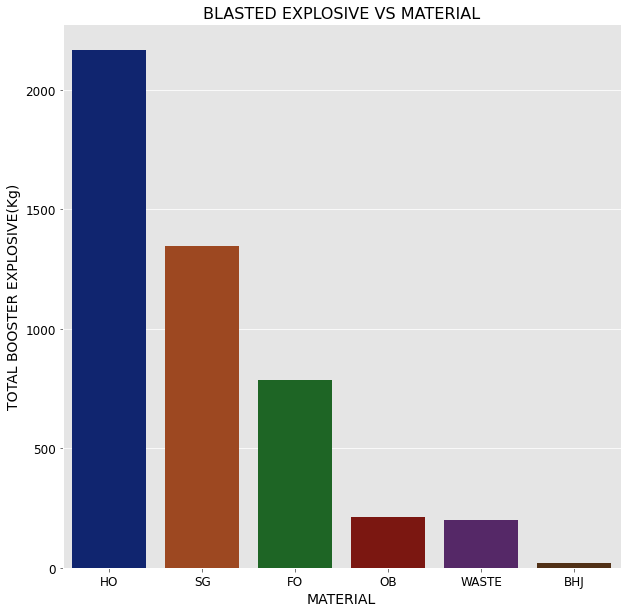

In [79]:
#visualising total booster explosive used for each material
plt.figure(figsize=(10,10))
sns.barplot(x='Material',y='Total Booster Explosive(Kg)',data=material_booster,palette='dark')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('TOTAL BOOSTER EXPLOSIVE(Kg)',color='BLACK',fontsize=14)
plt.xlabel('MATERIAL',color='BLACK',fontsize=14)
plt.title('BLASTED EXPLOSIVE VS MATERIAL',fontsize=16)
plt.show()

In [80]:
#calculating total booster explosive used in each pit
pit_booster=data.groupby('Pit',sort=False,as_index=False)['Total Booster Explosive(Kg)'].sum().sort_values(by='Total Booster Explosive(Kg)',ascending=False)

In [81]:
#printing total booster explosive used in each pit
pit_booster

,Pit,Total Booster Explosive(Kg)
2,Pit1,2585.00
0,Pit3,1474.87
1,Pit2,668.96


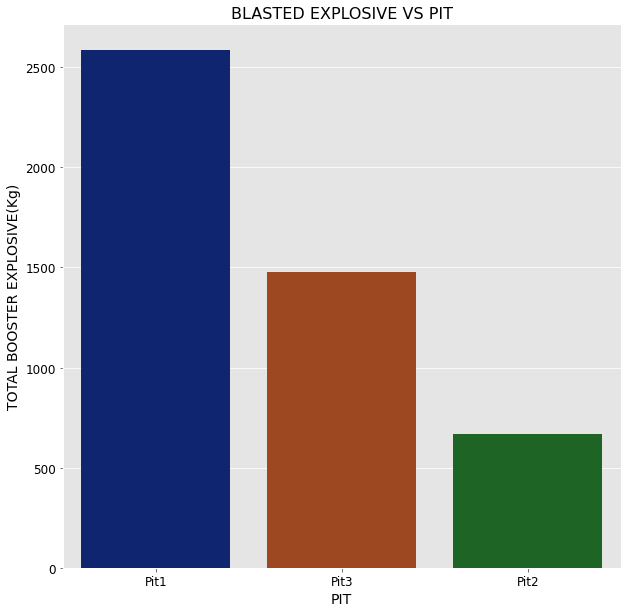

In [82]:
#visualising total booster explosive used in each pit
plt.figure(figsize=(10,10))
sns.barplot(x='Pit',y='Total Booster Explosive(Kg)',data=pit_booster,palette='dark')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('TOTAL BOOSTER EXPLOSIVE(Kg)',color='BLACK',fontsize=14)
plt.xlabel('PIT',color='BLACK',fontsize=14)
plt.title('BLASTED EXPLOSIVE VS PIT',fontsize=16)
plt.show()

In [83]:
#drill hours data in form of dictionary
drill_hours=dict({"April'22":358,"May'22":512,"June'22":584,"July'22":581,"August'22":690,"September'22":633,"october'22":623,"November'22":715,"December'22":688,"January'23":653})

In [84]:
#converting dictionary to pandas series
drill_hours_per_month=pd.Series(data=drill_hours)

In [85]:
#converting pandas series to pandas dataframe and reseting index
drill_hours_per_month=pd.DataFrame(drill_hours_per_month)
drill_hours_per_month=drill_hours_per_month.reset_index()

In [86]:
#renaming columns of drill hours data
drill_hours_per_month=drill_hours_per_month.rename(columns={0:'Drill Hours','index':'Month'})

In [87]:
#printing drill hours per month
drill_hours_per_month

,Month,Drill Hours
0,April'22,358
1,May'22,512
2,June'22,584
3,July'22,581
4,August'22,690
5,September'22,633
6,october'22,623
7,November'22,715
8,December'22,688
9,January'23,653


In [88]:
#calculating total meterage drilled per month
drill_meterage=data.groupby('Month',sort=False,as_index=False)['Meterage Blasted'].sum()

In [89]:
#printing meterage drilled per month
drill_meterage

,Month,Meterage Blasted
0,April'22,11398
1,May'22,11928
2,June'22,11607
3,July'22,11367
4,August'22,9052
5,September'22,14109
6,october'22,11953
7,November'22,11768
8,December'22,15175
9,January'23,15857


In [90]:
#joining meterage drilled and drill hours data on month
drill_summary=pd.merge(drill_meterage,drill_hours_per_month,on='Month')

In [91]:
#printing drill summary
drill_summary

,Month,Meterage Blasted,Drill Hours
0,April'22,11398,358
1,May'22,11928,512
2,June'22,11607,584
3,July'22,11367,581
4,August'22,9052,690
5,September'22,14109,633
6,october'22,11953,623
7,November'22,11768,715
8,December'22,15175,688
9,January'23,15857,653


In [92]:
#calculating drill rate and rounding off to 2 decimals
drill_summary['Drill Rate']=np.round(drill_summary['Meterage Blasted']/drill_summary['Drill Hours'],2)

In [93]:
#printing final drill summary
drill_summary

,Month,Meterage Blasted,Drill Hours,Drill Rate
0,April'22,11398,358,31.84
1,May'22,11928,512,23.30
2,June'22,11607,584,19.88
3,July'22,11367,581,19.56
4,August'22,9052,690,13.12
5,September'22,14109,633,22.29
6,october'22,11953,623,19.19
7,November'22,11768,715,16.46
8,December'22,15175,688,22.06
9,January'23,15857,653,24.28


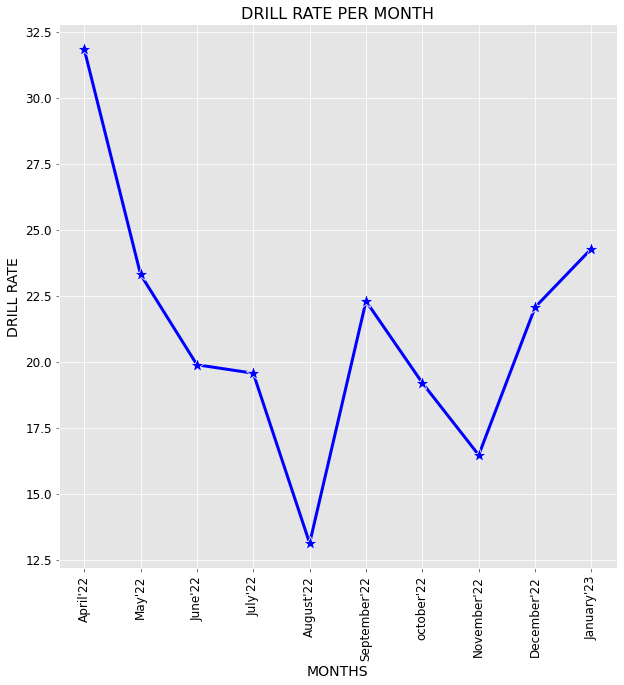

In [94]:
#visualising drill rate per month using lineplot
plt.figure(figsize=(10,10))
sns.lineplot(x='Month',y='Drill Rate',data=drill_summary,marker='*',markersize=15,color='Blue',linewidth=3)
plt.xticks(color='BLACK',fontsize=12,rotation=90)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('DRILL RATE',color='BLACK',fontsize=14)
plt.xlabel('MONTHS',color='BLACK',fontsize=14)
plt.title('DRILL RATE PER MONTH',fontsize=16)
plt.show()

In [95]:
#grouping data on month,material and pit
new_df=data.groupby(['Month','Material','Pit'],sort=False,as_index=False)['Site Mixed Emulsion(Kg)','Total Blasted Tonnage'].sum()

In [96]:
#assigning SME per kg cost
new_df['SME(PER KG)']=83.86

In [97]:
#calculating explosive/tonnage ratio
new_df['Explosive/Tonnage']=np.round(new_df['Site Mixed Emulsion(Kg)']/new_df['Total Blasted Tonnage'],2)

In [98]:
#calculating total SME cost
new_df['Total SME Cost(Rs)']=new_df['Site Mixed Emulsion(Kg)']*new_df['SME(PER KG)']

In [99]:
#calculating cost of sme invested per tonnage material extracted
new_df['Cost OF SME Per Tonnage']=np.round(new_df['SME(PER KG)']*new_df['Explosive/Tonnage'],2)

In [100]:
#printing the dataframe
new_df

,Month,Material,Pit,Site Mixed Emulsion(Kg),Total Blasted Tonnage,SME(PER KG),Explosive/Tonnage,Total SME Cost(Rs),Cost OF SME Per Tonnage
0,April'22,FO,Pit3,45820,224560.00,83.86,0.20,3842465.2,16.77
1,April'22,HO,Pit2,12690,61040.00,83.86,0.21,1064183.4,17.61
2,April'22,WASTE,Pit3,19860,83952.00,83.86,0.24,1665459.6,20.13
3,April'22,HO,Pit1,20790,84224.00,83.86,0.25,1743449.4,20.96
4,April'22,SG,Pit3,14540,56595.00,83.86,0.26,1219324.4,21.80
...,...,...,...,...,...,...,...,...,...
70,Feb'23,SG,Pit1,12730,48830.46,83.86,0.26,1067537.8,21.80
71,Mar'23,SG,Pit3,13190,60497.22,83.86,0.22,1106113.4,18.45
72,Mar'23,HO,Pit1,76110,329925.12,83.86,0.23,6382584.6,19.29
73,Mar'23,SG,Pit1,42050,196849.80,83.86,0.21,3526313.0,17.61


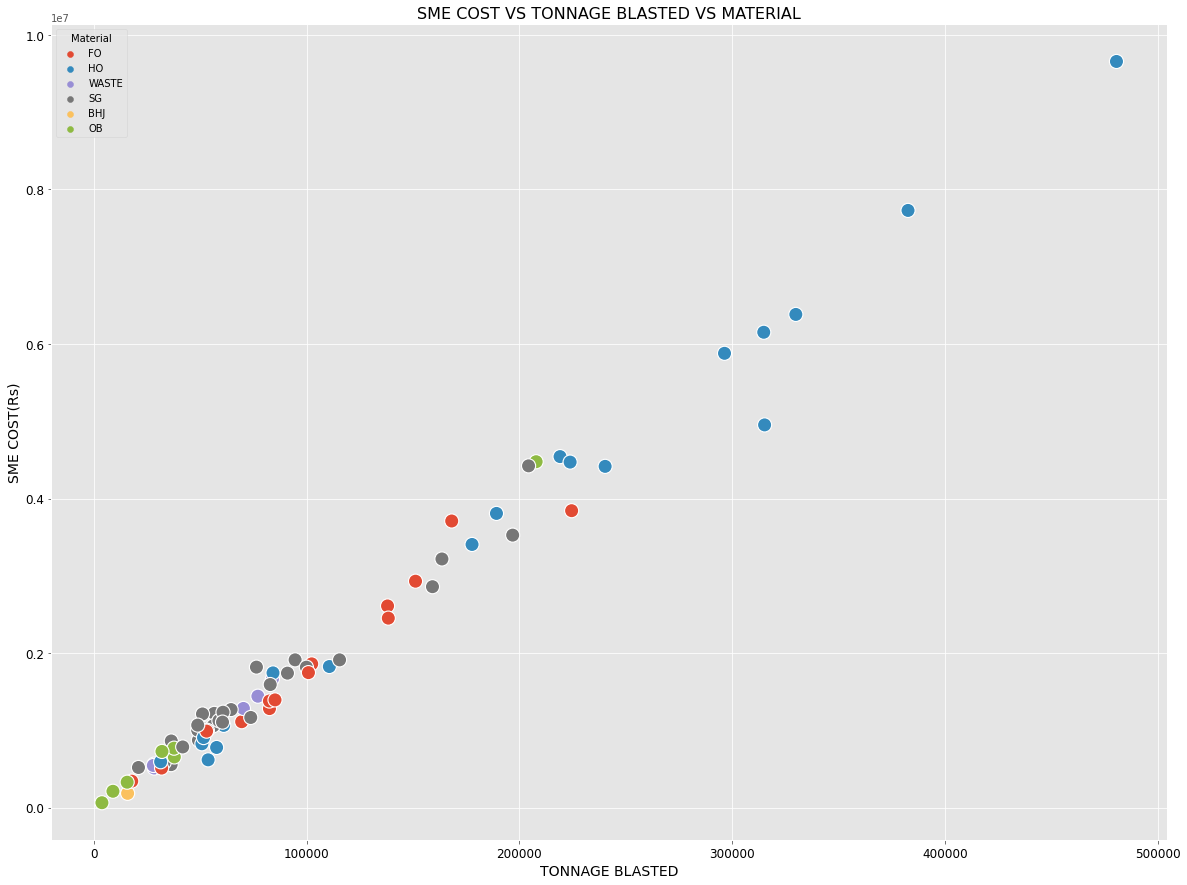

In [101]:
#visualising total sme cost and tonnage blasted for each material using scatterplot
plt.figure(figsize=(20,15))
sns.scatterplot(x='Total Blasted Tonnage',y='Total SME Cost(Rs)',data=new_df,hue='Material',s=200,alpha=1)
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('SME COST(Rs)',color='BLACK',fontsize=14)
plt.xlabel('TONNAGE BLASTED',color='BLACK',fontsize=14)
plt.title('SME COST VS TONNAGE BLASTED VS MATERIAL',fontsize=16)
plt.show()

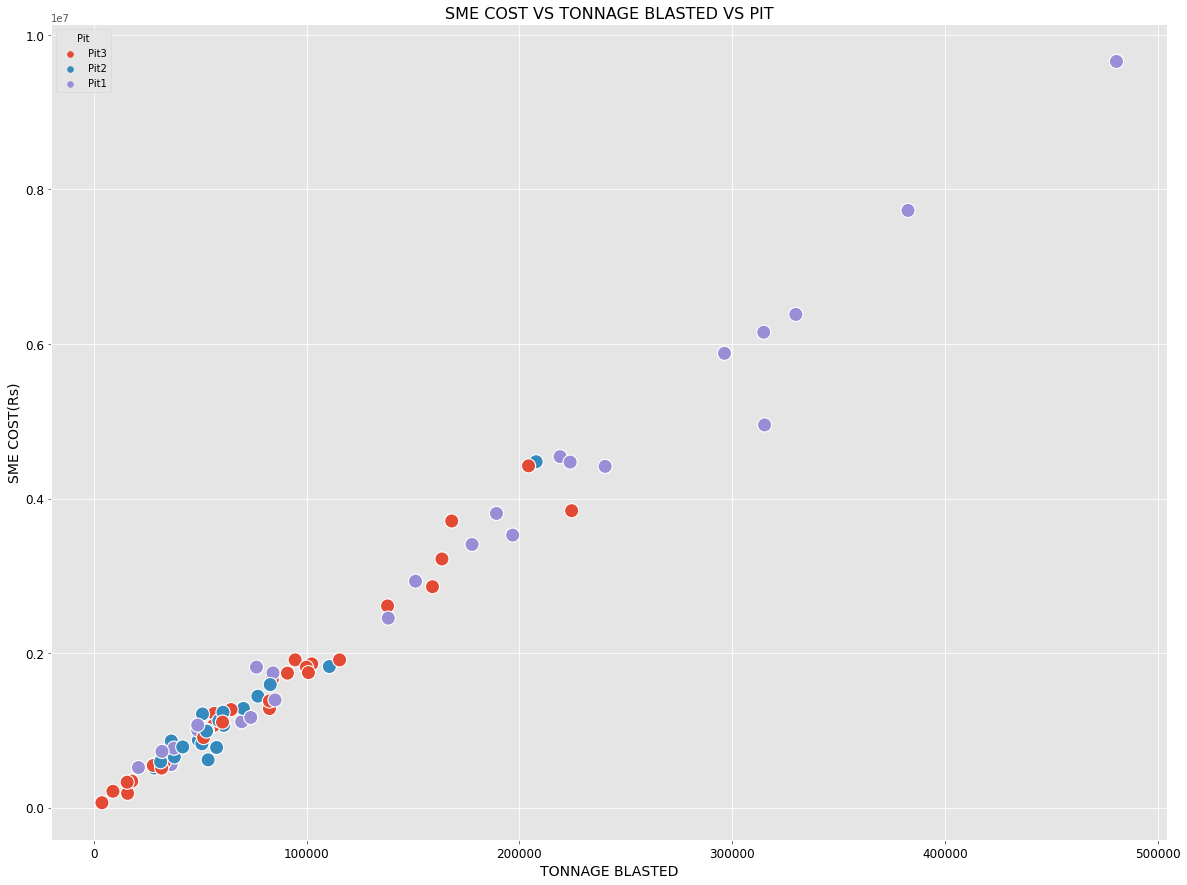

In [102]:
#visualising total sme cost vs tonnage blasted for each pit using scatterplot
plt.figure(figsize=(20,15))
sns.scatterplot(x='Total Blasted Tonnage',y='Total SME Cost(Rs)',data=new_df,hue='Pit',s=200,alpha=1)
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('SME COST(Rs)',color='BLACK',fontsize=14)
plt.xlabel('TONNAGE BLASTED',color='BLACK',fontsize=14)
plt.title('SME COST VS TONNAGE BLASTED VS PIT',fontsize=16)
plt.show()

In [103]:
new_data=data.groupby(['Month'],sort=False,as_index=False)['Site Mixed Emulsion(Kg)','Total Blasted Tonnage'].sum()
new_data['SME(PER KG)']=83.86
new_data['Explosive/Tonnage']=np.round(new_data['Site Mixed Emulsion(Kg)']/new_data['Total Blasted Tonnage'],2)
new_data['Total SME Cost(Rs)']=new_data['Site Mixed Emulsion(Kg)']*new_data['SME(PER KG)']
new_data['Cost OF SME Per Tonnage']=np.round(new_data['SME(PER KG)']*new_data['Explosive/Tonnage'],2)
new_data

,Month,Site Mixed Emulsion(Kg),Total Blasted Tonnage,SME(PER KG),Explosive/Tonnage,Total SME Cost(Rs),Cost OF SME Per Tonnage
0,April'22,133580,616211.00,83.86,0.22,11202018.80,18.45
1,May'22,156770,632065.00,83.86,0.25,13146732.20,20.96
2,June'22,123580,594905.82,83.86,0.21,10363418.80,17.61
3,July'22,132698,602048.88,83.86,0.22,11128054.28,18.45
4,August'22,106090,487982.28,83.86,0.22,8896707.40,18.45
5,September'22,161860,738031.71,83.86,0.22,13573579.60,18.45
6,october'22,145608,619427.64,83.86,0.24,12210686.88,20.13
7,November'22,140500,641752.38,83.86,0.22,11782330.00,18.45
8,December'22,198830,831181.68,83.86,0.24,16673883.80,20.13
9,January'23,204990,895455.96,83.86,0.23,17190461.40,19.29


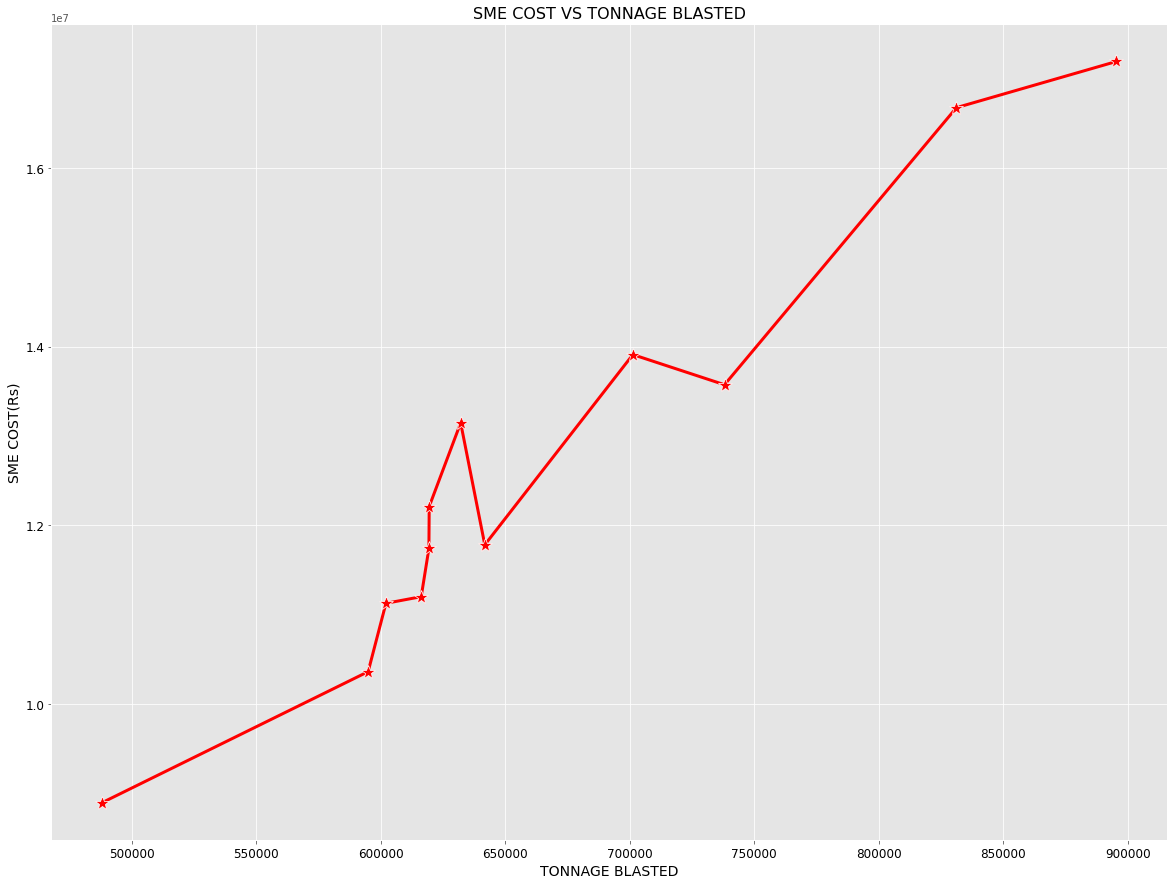

In [104]:
#visualising total sme cost vs tonnage blasted for each month using lineplot
plt.figure(figsize=(20,15))
sns.lineplot(x='Total Blasted Tonnage',y='Total SME Cost(Rs)',data=new_data,linewidth=3,marker='*',color='RED',markersize=15)
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('SME COST(Rs)',color='BLACK',fontsize=14)
plt.xlabel('TONNAGE BLASTED',color='BLACK',fontsize=14)
plt.title('SME COST VS TONNAGE BLASTED',fontsize=16)
plt.show()

In [105]:
#printing first five rows of dataset
data.head(5)

,Month,Date,Material,Pit,Reduced Level,Site Mixed Emulsion(Kg),Emulboost 125gm,Emulboost 250gm,DTH 6M,DTH 8M,DTH 10m,DTH 12m,TLD 5m (17ms),TLD 5m (25ms),TLD 5m (42ms),TLD 5m (65ms),TLD 5m (100ms),Electronic Detonator,Number Of Hole,Spacing,Burden,Meterage Blasted,Total Blasted Volume,Bulk Density,Total Blasted Tonnage,Powder Factor,Yield,Total Booster Explosive(Kg),Booster Ratio
0,April'22,2022-04-04,FO,Pit3,660,9120,66.0,66.0,0.0,66.0,0.0,66.0,0.0,28.0,23.0,23.0,0.0,2.0,66,4.0,4.0,693,11088.0,3.5,38808.0,4.26,56.0,24.75,0.002714
1,April'22,2022-04-04,HO,Pit2,700,3200,44.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,10.0,21.0,20.0,2.0,44,4.0,3.5,308,4312.0,4.0,17248.0,5.39,56.0,5.50,0.001719
2,April'22,2022-06-04,HO,Pit2,700,9490,137.0,40.0,0.0,97.0,0.0,0.0,50.0,48.0,47.0,0.0,0.0,2.0,137,4.0,3.5,782,10948.0,4.0,43792.0,4.61,56.0,27.12,0.002858
3,April'22,2022-07-04,WASTE,Pit3,670,7100,165.0,165.0,80.0,85.0,0.0,0.0,71.0,53.0,47.0,0.0,0.0,2.0,165,4.0,4.0,787,12592.0,3.0,37776.0,5.32,48.0,61.88,0.008715
4,April'22,2022-08-04,FO,Pit3,660,3200,47.0,0.0,0.0,47.0,0.0,0.0,20.0,17.0,17.0,0.0,0.0,2.0,47,4.0,4.0,329,5264.0,3.5,18424.0,5.76,56.0,5.88,0.001837


In [106]:
#filtering out the features for our prediction model
x=data.iloc[:,5:22].values

In [107]:
#printing the number of features of our prediction model
len(x[0])

17

In [108]:
#printing the values of features
x

array([[9.120e+03, 6.600e+01, 6.600e+01, ..., 4.000e+00, 4.000e+00,
        6.930e+02],
       [3.200e+03, 4.400e+01, 0.000e+00, ..., 4.000e+00, 3.500e+00,
        3.080e+02],
       [9.490e+03, 1.370e+02, 4.000e+01, ..., 4.000e+00, 3.500e+00,
        7.820e+02],
       ...,
       [7.130e+03, 4.700e+01, 6.700e+01, ..., 4.000e+00, 3.500e+00,
        5.700e+02],
       [1.062e+04, 5.000e+01, 7.900e+01, ..., 4.000e+00, 3.500e+00,
        8.110e+02],
       [8.670e+03, 6.100e+01, 6.100e+01, ..., 4.000e+00, 3.500e+00,
        6.410e+02]])

In [109]:
#filtering the label of our prediction model
y=data.iloc[:,22].values

In [110]:
#printing the values of label
y

array([11088. ,  4312. , 10948. , 12592. ,  5264. , 21056. , 16170. ,
       15392. , 19856. , 10384. ,  9152. , 29440. ,  9216. , 26166. ,
        8160. , 11970. , 21840. , 17556. ,  7488. , 26810. , 12600. ,
        8448. ,  5600. , 13384. ,  9982. ,  8820. , 15648. ,  2816. ,
        8386. , 14266. ,  7414.4,  9268. ,  9280. , 12264. , 17220. ,
       23161.6,  6468. ,  9344. ,  3696. , 11900. ,  8736. ,  3234. ,
        7200. ,  7840. ,  8096. , 13776. , 12936. ,  9408. ,  9450. ,
       13818. , 13678. , 12000. , 10724. ,  8612. ,  3840. , 11172. ,
        6804. ,  3682. ,  4128. ,  7490. ,  9996. , 13168. , 14266. ,
       14952. ,  6734. ,  8078. ,  8232. , 18080. ,  4208. , 18622. ,
       11081. ,  4172. , 16976. ,  2352. ,  6762. ,  4452. , 24388. ,
        4704. , 12642. , 25200. ,  5852. ,  8596. ,  9660. ,  4014. ,
       21028. , 12368. ,  5390. , 12320. , 12642. , 20320. , 15582. ,
       16758. ,  6930. ,  7700. , 17424. , 18074. ,  4998. ,  5124. ,
       18976. ,  477

In [111]:
#importing train_test_split from model_selection using sklearn library and splitting data into test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)

In [112]:
#importing LinearRegression algorithm and training the model  
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [113]:
#predicting values using test data
y_pred = regressor.predict(x_test)

In [114]:
#printing the predicted values 
y_pred=np.round(y_pred,2)
y_pred

array([ 8698.11, 14089.8 , 21658.48,  6495.23,  8686.31, 11214.89,
       12500.83, 13606.32, 17323.16, 13602.7 ,  3934.67, 15726.07,
        8202.16, 13094.18, 13442.16,  6810.28,  7676.95, 10000.79,
        2623.81,  8359.64,  6507.75,  4626.13, 15370.84, 10807.83,
       16908.07, 12254.78, 13649.1 ,  6704.86,  7483.61, 11156.3 ,
       20096.9 ,  3855.47,  8738.  , 23875.29, 21423.03,  5692.89,
        2942.67])

In [129]:
#importing r2 score 
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score
print('The r2 score for linear regression model is {0}'.format(score))

The r2 score for linear regression model is 0.9764522450570602


In [116]:
#printing the actual values and corresponding predicted values
actual_predicted=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
result=pd.DataFrame(actual_predicted,columns=['Predicted','Actual'])
result

,Predicted,Actual
0,8698.11,8448.0
1,14089.80,14266.0
2,21658.48,22880.0
3,6495.23,6412.0
4,8686.31,8096.0
5,11214.89,11088.0
6,12500.83,11900.0
7,13606.32,13678.0
8,17323.16,18080.0
9,13602.70,13566.0


In [130]:
#printing the rmse score for model
from sklearn.metrics import mean_squared_error
print("RMSE score of linear regression model is", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score of linear regression model is 836.8750556490302


In [118]:
#importing DecisionTreeRegressor for constructing prediction model
from sklearn.tree import DecisionTreeRegressor
regressor_2 = DecisionTreeRegressor(criterion='squared_error',random_state = 32)
regressor_2.fit(x_train, y_train)

DecisionTreeRegressor(random_state=32)

In [119]:
#predicting values using test data
y_pred_2 = regressor.predict(x_test)

In [120]:
#printing the predicted values
y_pred_2=np.round(y_pred_2,2)
y_pred

array([ 8698.11, 14089.8 , 21658.48,  6495.23,  8686.31, 11214.89,
       12500.83, 13606.32, 17323.16, 13602.7 ,  3934.67, 15726.07,
        8202.16, 13094.18, 13442.16,  6810.28,  7676.95, 10000.79,
        2623.81,  8359.64,  6507.75,  4626.13, 15370.84, 10807.83,
       16908.07, 12254.78, 13649.1 ,  6704.86,  7483.61, 11156.3 ,
       20096.9 ,  3855.47,  8738.  , 23875.29, 21423.03,  5692.89,
        2942.67])

In [121]:
#printing the actual values and corresponding predicted values
actual_predicted=np.concatenate((y_pred_2.reshape(len(y_pred_2),1), y_test.reshape(len(y_test),1)),1)
result_2=pd.DataFrame(actual_predicted,columns=['Predicted','Actual'])
result_2

,Predicted,Actual
0,8698.11,8448.0
1,14089.80,14266.0
2,21658.48,22880.0
3,6495.23,6412.0
4,8686.31,8096.0
5,11214.89,11088.0
6,12500.83,11900.0
7,13606.32,13678.0
8,17323.16,18080.0
9,13602.70,13566.0


In [131]:
#calculating and printing the r2 score
from sklearn.metrics import r2_score
score_2 = r2_score(y_test,y_pred_2)
score_2
print('The r2 score for decision tree regressor is {}'.format(score_2))

The r2 score for decision tree regressor is 0.9764522450570602


In [132]:
#printing the rmse score of model
print("RMSE score of decision tree regressor model is", np.sqrt(mean_squared_error(y_test, y_pred_2)))

RMSE score of decision tree regressor model is 836.8750556490302


In [124]:
#importing RandomForestRegressor and training the model using training data
from sklearn.ensemble import RandomForestRegressor
regressor_3 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_3.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [125]:
#printing the predicted values
y_pred_3 = regressor_3.predict(x_test)
y_pred_3=np.round(y_pred_3,2)
y_pred_3

array([ 8756.8 , 13961.5 , 20641.2 ,  6293.4 ,  8125.8 ,  9968.84,
       11767.8 , 13766.9 , 16783.4 , 13662.6 ,  2330.2 , 15966.2 ,
        6530.  , 13878.1 , 14124.  ,  7434.84,  8278.96,  9653.2 ,
        2922.1 ,  9357.8 ,  6327.8 ,  5276.6 , 13876.8 , 11070.  ,
       17468.  , 12040.2 , 13282.8 ,  7362.6 ,  7949.2 , 11155.2 ,
       20284.4 ,  4502.  ,  9080.04, 23753.2 , 23005.16,  5847.2 ,
        3681.6 ])

In [126]:
#printing the actual values and corresponding predicted values
actual_predicted=np.concatenate((y_pred_3.reshape(len(y_pred_3),1), y_test.reshape(len(y_test),1)),1)
result_3=pd.DataFrame(actual_predicted,columns=['Predicted','Actual'])
result_3

,Predicted,Actual
0,8756.80,8448.0
1,13961.50,14266.0
2,20641.20,22880.0
3,6293.40,6412.0
4,8125.80,8096.0
5,9968.84,11088.0
6,11767.80,11900.0
7,13766.90,13678.0
8,16783.40,18080.0
9,13662.60,13566.0


In [133]:
#printing the r2 score
from sklearn.metrics import r2_score
score_3 = r2_score(y_test,y_pred_3)
score_3
print('The r2 score for random forest regressor model is {}'.format(score_3))

The r2 score for random forest regressor model is 0.972497302519146


In [134]:
#printing the rmse score for model
print("RMSE score for random forest regressor model is ", np.sqrt(mean_squared_error(y_test, y_pred_3)))

RMSE score for random forest regressor model is  904.4269925565385


**WITH LINEAR REGRESSION AND DECISION TREE REGRESSOR WE GOT THE BEST VALUES FOR PERFORMANCE METRIC AS 0.976(R2 SCORE) AND 836.875(RMSE).**